****

`bafcn_01_02_predictive_analytics_with_python_cn.ipynb` | 2025-10-09 00:02

# 1.9.1 使用 Python 进行预测性分析

# 使用 Python 进行预测性分析

## 使用 Python 进行预测性分析

“潜在客户”（lead）是指对你的产品或服务表现出兴趣的人。将潜在客户转化为实际客户是每个企业的核心目标。销售和市场团队会投入大量时间进行潜在客户的获取与管理。

关键问题是：
*   哪些潜在客户更有可能转化？
*   销售团队应如何分配时间和资源？

一种数据驱动的解决方案是 预测性潜在客户评分（Predictive Lead Scoring）。它利用历史数据建立模型，预测每个潜在客户的转化可能性，从而帮助销售团队优先处理最有可能转化的客户。

在本教程中，我们将使用 Python 分析潜在客户数据集，并构建一个模型来预测客户是否会转化。我们将完成以下步骤：

*   加载并探索数据
*   可视化数据
*   构建预测模型
*   分析影响转化的关键因素
*   使用模型预测新客户的转化可能性
*   评估模型的商业价值

最终目标是：从一张客户信息表出发，找到提升收入的策略。



快速实现的 Python 代码（核心流程）:

```python
df = pd.read_csv('leads_train.csv')               # 读取训练数据集
df.info()                                         # 显示数据结构和字段信息
df.describe()                                     # 展示数值字段的统计摘要
df['Lead Origin'].value_counts()              # 统计“潜在客户来源”的分布情况
s = setup(df, target='Converted')             # 使用 PyCaret 设置模型环境，目标变量为“是否转化”
best_model = compare_models()           # 自动比较多个模型，选出表现最好的
plot_model(best_model, plot='feature')  # 可视化模型的特征重要性
plot_model(best_model, plot='confusion_matrix') # 绘制混淆矩阵，评估模型预测效果
add_metric('profit', 'Profit', calculate_profit) # 添加自定义指标“利润”，用于商业评估
new_leads = pd.read_csv('new_leads.csv') # 读取新潜在客户数据
new_leads_predictions = predict_model(best_model, data=new_leads) # 使用最佳模型进行预测
```

## 环境设置


📌注意：如果在运行上述安装代码后出现提示，这意味着你可能需要**重新启动内核（kernel）**以便使用更新后的软件包。
> 信息如下所示：
    >> Note: you may need to restart the kernel to use updated packages.

📌 解决方法：

点击顶部菜单栏中的 “kernal（核）” → “Restart kernal（重新启动核）”。

重新运行安装代码和导入代码单元。

这样可以确保新安装或更新的库被正确加载。

In [15]:
%pip install --quiet pycaret==3.3.2 pandas==2.1.4 seaborn==0.13.2 matplotlib==3.7.5 numpy==1.26.4 ydata-profiling==4.16.1 openpyxl==3.1.5

Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × installing build dependencies for pandas did not run successfully.
  │ exit code: 1
  ╰─> [55 lines of output]
      Ignoring oldest-supported-numpy: markers 'python_version < "3.12"' don't match your environment
        Using cached numpy-1.26.4.tar.gz (15.8 MB)
        Installing build dependencies: started
        Installing build dependencies: finished with status 'done'
        Getting requirements to build wheel: started
        Getting requirements to build wheel: finished with status 'done'
        Installing backend dependencies: started
        Installing backend dependencies: finished with status 'done'
        Preparing metadata (pyproject.toml): started
        Preparing metadata (pyproject.toml): finished with status 'error'
        error: subprocess-exited-with-error
      
        \xc3\x97 Preparing metadata (pyproject.toml) did not run successfully.
        \xe2\x94\x82 exit code: 1
        \xe2\x95售\x94\x80> [21 lines of ou

In [1]:
# 设置可视化样式。seaborn 是一个常用于可视化的库。这里我们设置了全局绘图主题，使图表更清晰、美观。

import seaborn as sns

sns.set_theme(style="white", rc={'figure.figsize': (12, 6)})
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})

## 加载与查看数据

📌注意：

在加载数据前，必须确认数据文件是否与 Jupyter Notebook 位于**同一文件目录中**，如果数据文件是和当前notebook保存在同一文档，那么可以直接运行后面的代码。

如果数据文件位于不同目录中，则需要提供文件的完整路径：
> 如果在 Windows 上，可以复制完整数据文件路径，然后替换文件所在位子：'C:/Users/YourName/Documents/my_data.csv'
>
> 如果在 Linux/macOS 上，可以复制完整数据文件路径，然后替换文件所在位子：'/home/YourName/Documents/my_data.csv'
>
pd.read_csv 会将 CSV 文件读取为一个 `pandas` 的数据框（DataFrame），之后我们可以使用 head 方法来查看前几行数据。

本练习要用到的时在客户数据 **leads.csv**

In [2]:
#使用pandas库加载数据
import pandas as pd

# 将 CSV 数据读取到 pandas 数据框（DataFrame）中，并显示所选列的前 5 行。
# 假设数据文件位于不同目录中，请将 'leads.csv' 替换为你文件所在的位置。
# 例如：Windows 用户可以替换文件所在位子：'C:/Users/YourName/Documents/my_data.csv'
# 例如：苹果用户可以替换文件所在位子：'C:/Users/YourName/Documents/my_data.csv'

df = pd.read_csv('leads.csv')
show_cols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']
df[show_cols].head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,API,Olark Chat,No,No,0,0.0,0,0.0
1,API,Organic Search,No,No,0,5.0,674,2.5
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0


另外两个非常有用的方法是 shape 和 info。

shape 方法会返回数据集的行数和列数。

info 方法则会显示每一列的数据类型，以及每列中非空（非缺失）值的数量。

所谓的 “null” 值，指的是缺失值，可能是由于数据收集或录入过程中的错误造成的。

In [4]:
# 数据集中共有多少行和多少列？

df.shape

(8316, 35)

In [5]:
# 显示数据集中的列名、各列的数据类型以及非空值的数量。

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8316 entries, 0 to 8315
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8316 non-null   object 
 1   Lead Source                                    8284 non-null   object 
 2   Do Not Email                                   8316 non-null   object 
 3   Do Not Call                                    8316 non-null   object 
 4   Converted                                      8316 non-null   int64  
 5   TotalVisits                                    8192 non-null   float64
 6   Total Time Spent on Website                    8316 non-null   int64  
 7   Page Views Per Visit                           8192 non-null   float64
 8   Last Activity                                  8219 non-null   object 
 9   Country                                        6092 

## 模型可视化与评估

我们可以使用 `describe` 方法来查看数值列的一些基本统计信息，例如：

* 数据总数（count）

* 平均值（mean）

* 标准差（standard deviation）

* 最小值（minimum）

* 最大值（maximum）

* 四分位数（quartiles）

这些统计信息有助于我们快速了解数据的分布情况和可能存在的异常值。

我们还可以使用可视化方法来理解每一列数据的分布情况，以及不同列之间的关系。

借助 `seaborn` 库，我们可以创建直方图（histogram）、散点图（scatter plot）以及其他类型的图表来可视化数据。

In [7]:
# 数值型列的分布情况

df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Activity Score,Profile Score
count,8316.000000,8192.000000,8316.000000,8192.000000,4520.000000,4520.000000
mean,0.382997,3.434814,486.067100,2.359569,14.303319,16.346018
std,0.486147,4.980014,547.428425,2.169593,1.389203,1.807316
min,0.000000,0.000000,0.000000,0.000000,8.000000,11.000000
25%,0.000000,1.000000,11.000000,1.000000,14.000000,15.000000
50%,0.000000,3.000000,247.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,932.000000,3.000000,15.000000,18.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# 我们的潜在客户（leads）来自哪些渠道？

df['Lead Origin'].value_counts()

Lead Origin
Landing Page Submission    4374
API                        3246
Lead Add Form               650
Lead Import                  45
Quick Add Form                1
Name: count, dtype: int64

> [!activity] **思考讨论**:

`Lead Origin` 表示潜在客户的“起始来源”，例如是通过登陆页面、推荐链接还是其他渠道进入系统。

`Lead Source` 表示潜在客户的“具体来源”，例如是通过 Google 广告、社交媒体、直接访问等方式获取。

我们可以使用 `value_counts` 方法来找出最常见的潜在客户来源.

潜在客户的来源（Lead Origin）很可能在判断客户是否会转化中起到重要作用。我们可以使用图表来可视化不同来源的客户转化率。

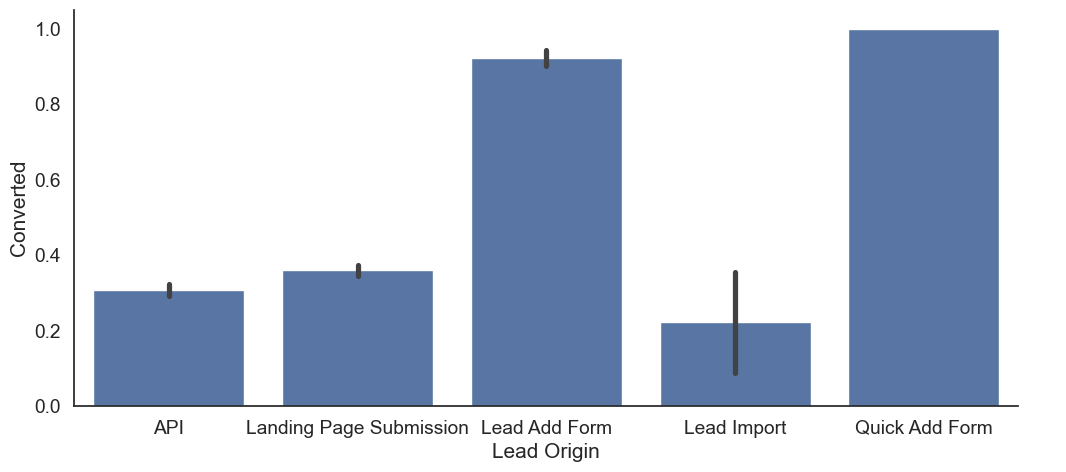

In [7]:
# 绘制按来源（origin）划分的潜在客户（leads）分布图。

sns.catplot(data=df, x='Lead Origin', y='Converted', kind="bar").set(aspect=2)

# 将图表宽度设置为高度的两倍，以适配 Canvas 显示比例。
import matplotlib.pyplot as plt

plt.gcf().set_size_inches(12, 6)

# 图像说明：柱状图显示了不同潜在客户来源的转化率。Quick Add Form 的转化率最高，为 1.0，其次是 Lead Add Form，约为 0.9。API 和 Landing Page Submission 的转化率相近，约为 0.3，而 Lead Import 的转化率最低，约为 0.2。误差线表示数据的方差。

评估任务 1将会让你在 Tableau 中为`Lead Source` 创建一个可视化图表，以观察不同潜在客户来源对转化率的影响。你可以根据自己的判断，选择任何合适的可视化类型和筛选技术来呈现数据。

网站的访问总次数是否可能是预测客户转化的一个有效指标？我们先来看看 `TotalVisits`（总访问次数）的分布情况。网站的典型访问次数是多少？

In [8]:
df['TotalVisits'].describe()

count    8192.000000
mean        3.434814
std         4.980014
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

根据这些信息，我们可以得出以下结论：平均访问次数（mean）：3.4 次；中位数（median，即 50% 分位数）：3 次；25% 到 75% 的范围（四分位区间）：1 到 5 次访问。

请计算 `Total Time Spent on Website`（在网站上停留的总时间）和 `Page Views Per Visit`（每次访问的页面浏览数）的一些基础统计信息。 使用这些统计结果来描述网站访客的典型行为模式。

我们还可以使用直方图来可视化网站访问次数的分布情况。可以使用 `seaborn` 库中的 `histplot` 函数来绘制直方图。

<Axes: xlabel='TotalVisits', ylabel='Count'>

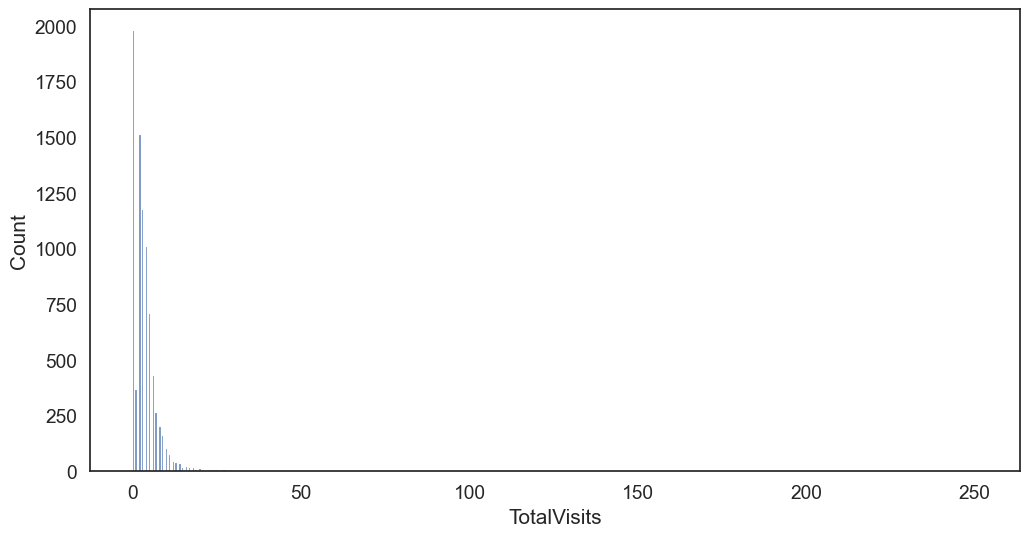

In [10]:
# 绘制 “总访问次数”（TotalVisits）的直方图

sns.histplot(data=df, x='TotalVisits')

# 图像说明：这是一张展示“总访问次数”（TotalVisits）分布的直方图。x 轴范围为 0 到 250 次访问，y 轴显示用户数量，最大值约为 2000。数据呈明显的右偏态分布，大多数用户的访问次数集中在接近 0 的区域，图像左侧形成一个非常高的峰值。随着访问次数的增加，用户数量急剧下降。

某个潜在客户的访问次数高达 251 次，这样的极端值会影响直方图的可读性，使其在我们的分析中变得不太有用。我们可以将 x 轴限制在 0 到 15 次访问的范围内，以更清晰地展示大多数客户的访问分布。

[(0.0, 15.0)]

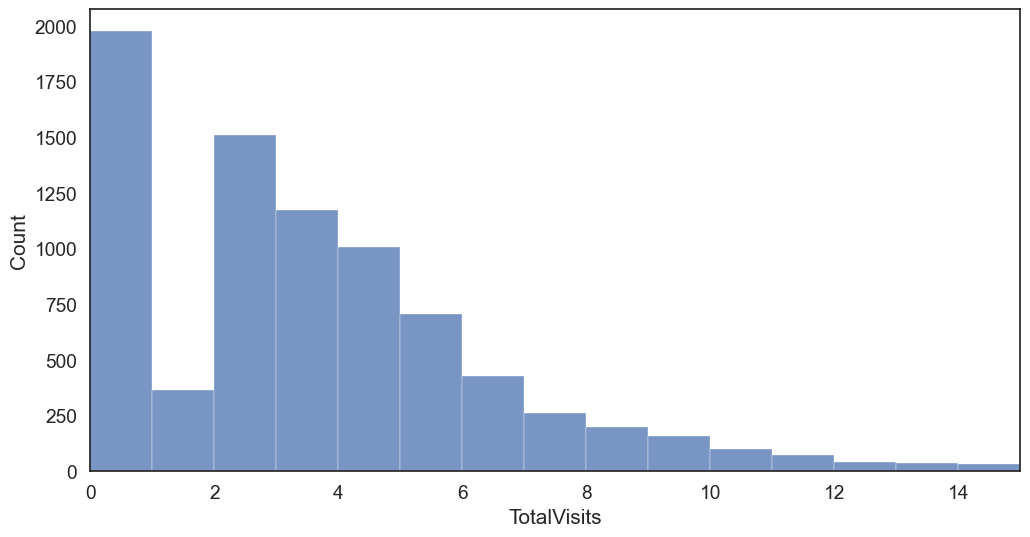

In [11]:
# “总访问次数”分布的直方图, x 轴范围为 0 到 15 次访问, 每个区间（柱）代表 1 次访问。

sns.histplot(data=df, x='TotalVisits', binwidth=1).set(xlim=(0, 15))

# 图像说明：这是一张展示“总访问次数”分布的直方图，x 轴范围为 0 到 15 次访问，y 轴显示用户数量，最大值约为 2000。该分布呈右偏态，访问次数为 0 的用户数量最多，随后迅速下降。随着访问次数的增加，用户数量持续减少，超过 12 次访问的情况非常少见。

我们在这些直方图中观察到一些异常现象：

* 有大量潜在客户完全没有访问过网站。这些客户是从哪里来的？是否值得继续跟进？
* 只有相对较少的潜在客户访问网站一次。这是数据收集的问题，还是我们可视化方式的问题？
* 虽然极少数客户访问网站超过 15 次，但也有一些客户访问次数超过 250 次！这些客户对销售团队来说是否非常有潜力，还是只是会给我们的分析带来麻烦？

探索性可视化会引发许多类似的问题，而这些问题可以通过进一步的数据分析和领域知识来解答。你不可能有时间回答所有问题。请将它们记录下来，优先处理那些与当前任务密切相关的问题，其余的可以在你明确目标和分析方法后再进行回顾。



### 网站停留总时间与客户转化率之间的关系

网站停留总时间是否会影响客户转化率？

我们可以绘制一个图表，展示不同转化状态下的网站停留时间分布情况，以便观察两者之间的关系。

<Axes: xlabel='Total Time Spent on Website', ylabel='Count'>

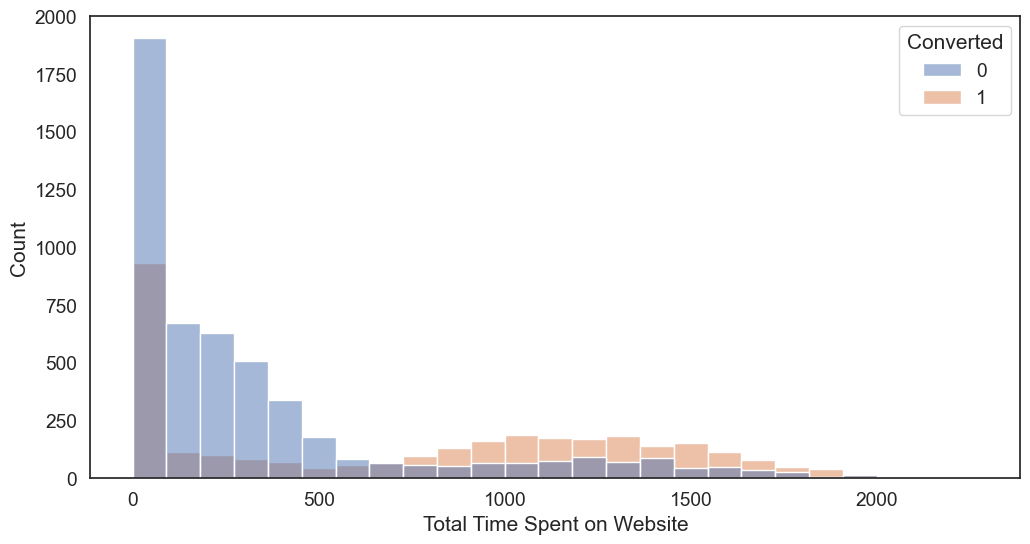

In [12]:
# “网站停留总时间”的堆叠柱状图

sns.histplot(data=df, x='Total Time Spent on Website', hue='Converted')

# 图像说明：这是一张堆叠柱状图，展示了按“网站停留总时间”分组的已转化用户（橙色）与未转化用户（蓝色）数量。图表显示，停留时间较短（0–2）的用户转化率较低，而随着停留时间增加，转化率逐渐上升，随后趋于平稳。总体来看，用户数量随着停留时间的增加而减少，大多数用户的停留时间集中在 0–6 的区间内

显然是的！在网站上停留时间更长的访客，更有可能完成转化。从图表中可以直观地看到，访问次数在某个区间“发生转变”——从代表未转化变成代表已转化。这种趋势表明该变量是一个很好的转化预测因子。

我们可以合理预期，模型在训练过程中会为这个变量分配较高的重要性权重。它可能在特征重要性图中排名靠前，成为影响预测结果的关键因素之一。

[活动] 评估任务 1：

请在 Tableau 中创建一个可视化图表，展示以下任一变量与客户转化率之间的关系：
`Total Time Spent on Website`（在网站上停留的总时间）
`TotalVisits`（访问网站的总次数）
`Page Views Per Visit`（每次访问的页面浏览数）

你可以根据自己的判断，选择最合适的图表类型和筛选技术来呈现数据。

### 活动评分与客户转化率之间的关系

另一个重要的变量是 `Activity Score`（活动评分），它用于衡量潜在客户的活跃程度。我们可以同时观察以下几个变量之间的关系：网站停留总时间（Total Time Spent on Website）, 活动评分（Activity Score）, 潜在客户来源（Lead Origin）,是否转化（Conversion Status)。

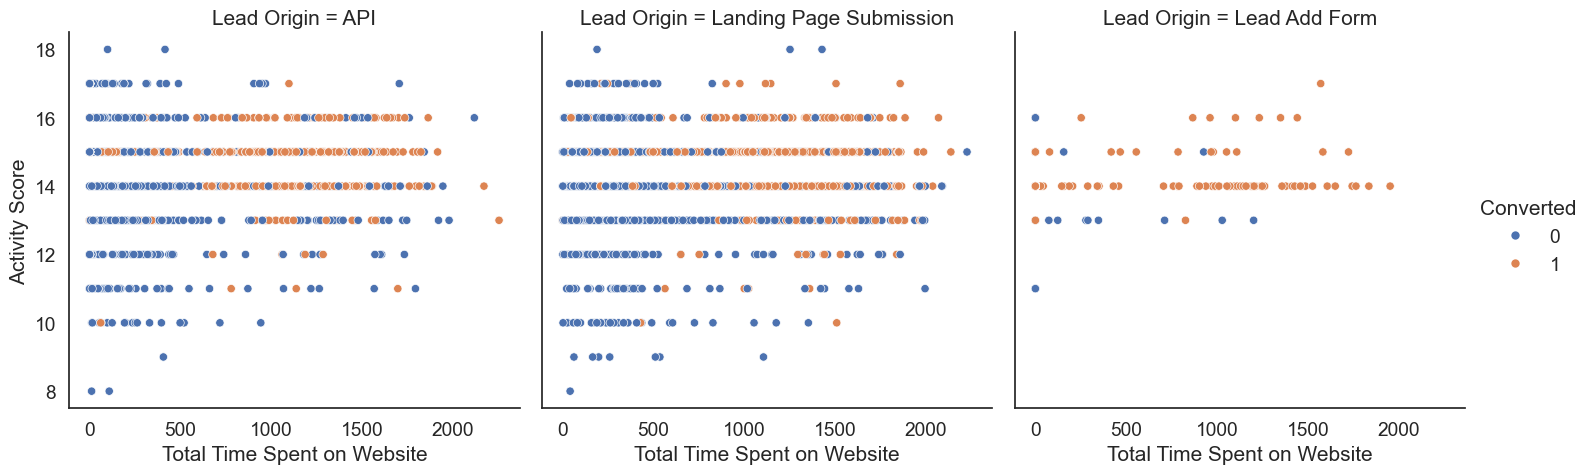

In [13]:
# 绘制网站停留总时间（Total Time on Website）与活动评分（Activity Score）的关系图，并按来源（origin）分面展示。
import seaborn as sns

# 仅绘制主要来源：API、Landing Page Submission 和 Lead Add Form
plot_df = df[df['Lead Origin'].isin(['API', 'Landing Page Submission', 'Lead Add Form'])]

# 使用 relplot 创建分面散点图
# 添加回归线以展示关系
sns.relplot(data=plot_df,
            x='Total Time Spent on Website',
            y='Activity Score',
            col='Lead Origin',
            hue='Converted',
            kind='scatter',
            )

# 图像说明: 三张散点图展示了“网站停留总时间”（x 轴）与“活动评分”（y 轴）之间的关系，分别对应三种潜在客户来源：API、Landing Page Submission 和 Lead Add Form。图中的点根据转化状态着色（蓝色表示未转化，橙色表示已转化）。

# 图像显示：已转化的潜在客户（橙色点）在所有来源中都倾向于集中在较高的活动评分区域，尤其是在活动评分为 14–17 的区间内，转化数量最多。

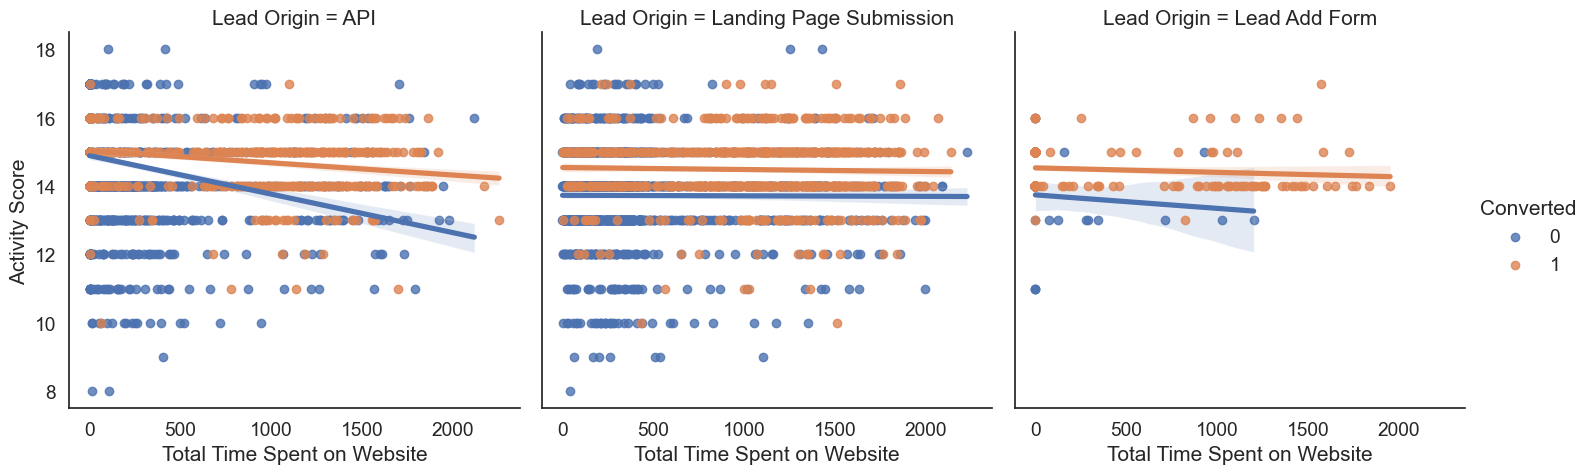

In [14]:
sns.lmplot(data=plot_df, x='Total Time Spent on Website', y='Activity Score', col='Lead Origin', hue='Converted')

# 图像说明:三张散点图展示了“网站停留总时间”（x 轴）与“活动评分”（y 轴）之间的关系，分别对应三种潜在客户来源：API、Landing Page Submission 和 Lead Add Form。图中的点根据转化状态着色（蓝色表示未转化，橙色表示已转化）。

# 在 API 来源的图表中，数据呈现出负相关关系，趋势线向下倾斜，说明停留时间越长，活动评分反而越低，可能暗示该来源的客户行为较为异常或复杂。而在 Landing Page Submission 和 Lead Add Form 的图表中，两者之间的关系较为平坦，没有明显的趋势，说明这两个来源的客户在停留时间与活跃度之间没有显著的线性关联。

评估任务 1将会要求你在 Tableau 中创建一个可视化图表，展示客户转化状态（Converted）与至少两个其他变量之间的显著关系。你可以自由选择变量，例如：

* Total Time Spent on Website（网站停留总时间）
* Activity Score（活动评分）
* TotalVisits（访问次数）
* Page Views Per Visit（每次访问的页面浏览数）
* Lead Source 或 Lead Origin（客户来源）


## 模型构建

我们将使用 `pycaret` 库来构建一个模型，用于预测潜在客户是否会转化。`pycaret` 提供了一个高级接口，可以快速完成机器学习模型的训练与评估，非常适合快速构建和比较多个模型。

我们将使用 setup 函数来配置训练数据，并使用 `compare_models` 函数来自动比较不同的模型，从中选择表现最优的一个。

In [15]:
# 设置一个 PyCaret 分类组群，以预测客户流失。

from pycaret.classification import *

s = setup(df, target = 'Converted')

,Description,Value
0,Session id,4525
1,Target,Converted
2,Target type,Binary
3,Original data shape,"(8316, 35)"
4,Transformed data shape,"(8316, 156)"
5,Transformed train set shape,"(5821, 156)"
6,Transformed test set shape,"(2495, 156)"
7,Numeric features,5
8,Categorical features,29
9,Rows with missing values,78.9%


从预测建模的角度来看，我们可以获得大量关于数据的信息，包括：数据的行数和列数，特征总数，分类特征与数值特征的数量，缺失值的数量。

请注意，数据中存在大量缺失值。在构建模型时，PyCaret 会自动处理这些缺失值以及其他数据预处理任务。在我们手动处理之前，可以先尝试让 PyCaret 自动完成这些准备工作。

我们将使用 `compare_models` 函数来比较不同模型在数据上的表现，并选择其中最优的模型进行后续分析。这样可以快速识别出最具预测能力的算法，节省调参和测试的时间。

In [16]:
# 比较不同模型

best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9383,0.9801,0.9179,0.9211,0.9193,0.8694,0.8697,0.1990
rf,Random Forest Classifier,0.9370,0.9748,0.9040,0.9299,0.9165,0.8659,0.8664,0.0990
gbc,Gradient Boosting Classifier,0.9356,0.9796,0.9035,0.9267,0.9148,0.8630,0.8634,0.1570
et,Extra Trees Classifier,0.9316,0.9710,0.8950,0.9244,0.9093,0.8544,0.8550,0.1020
lr,Logistic Regression,0.9294,0.9740,0.8950,0.9187,0.9065,0.8498,0.8502,0.4750
ada,Ada Boost Classifier,0.9256,0.9741,0.8883,0.9153,0.9015,0.8417,0.8422,0.1090
lda,Linear Discriminant Analysis,0.9254,0.9728,0.8802,0.9218,0.9004,0.8409,0.8416,0.0770
ridge,Ridge Classifier,0.9253,0.9732,0.8789,0.9226,0.9001,0.8404,0.8412,0.0670
dt,Decision Tree Classifier,0.9064,0.9020,0.8843,0.8733,0.8784,0.8023,0.8027,0.1850
nb,Naive Bayes,0.8380,0.9275,0.9121,0.7327,0.8122,0.6729,0.6859,0.2510


在本案例中，表现最好的模型是 Gradient Boosting Classifier。该模型在训练数据上的预测准确率达到了 93.4%，并且其“曲线下面积”（AUC）为 0.9786。

AUC 是分类任务中常用的评估指标：AUC = 1.0 表示模型完美预测，AUC = 0.5 表示模型的表现与随机猜测无异。

接下来，我们将通过以下两个方式来理解模型的预测机制。

## 模型解释

在 PyCaret 中，`plot_model` 函数可以用来可视化模型性能的多个方面。我们首先来看“特征重要性”（Feature Importance）图，它展示了每个特征在模型预测中所起的作用大小。

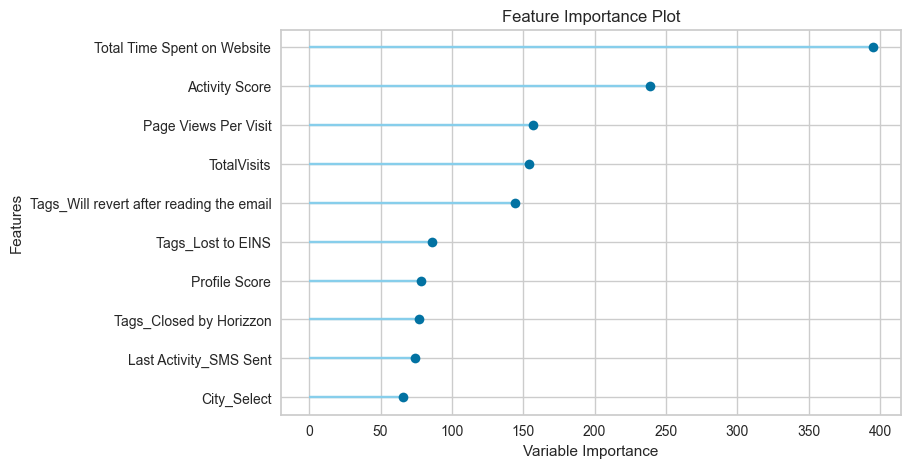

In [17]:
# 特征重要性图

plot_model(best_model, plot='feature')
# 图像说明：特征重要性图展示了在预测结果时，10 个变量的相对重要性。“Total Time Spent on Website”（网站停留总时间）的重要性最高，约为 0.185，其次是 “Tags_Will revert after reading the email”（标签：阅读邮件后将回复），约为 0.14。其他显著特征包括 “Lead Origin_Lead Add Form”（客户来源：表单添加，0.11）和 “Last Notable Activity_SMS Sent”（最近活动：发送短信，0.095）。其余变量的重要性分数较低，约在 0.025 到 0.07 之间。


根据这张图表，最重要的特征是 `Total Time Spent on Website`（网站停留总时间）、`Activity Score`（活动评分）和 `Page Views Per Visit`(每次访问的页面浏览数）。这些特征在预测潜在客户是否会转化方面起着关键作用。模型将它们赋予了最高的权重，说明它们在区分已转化与未转化客户时具有最强的预测能力。

[活动] 评估任务 1：请使用 PyCaret 的 `plot_model` 函数来理解模型的预测机制。我们将重点查看“特征重要性”图，以识别哪些变量在预测潜在客户是否转化时最为关键。

模型在哪些地方出错？我们可以使用混淆矩阵来评估模型对目标变量的预测效果。

类别 0 表示“未转化”，类别 1 表示“已转化”。因此，预测为 1 且实际为 1 的单元格表示那些被预测为会转化且确实转化的潜在客户，即“真正例”（True Positives）。预测为 0 且实际为 0 的单元格表示那些被预测为不会转化且确实未转化的客户，即“真负例”（True Negatives）。另外两个单元格分别是“假正例”（False Positives）和“假负例”（False Negatives）。

这两个正确预测的单元格（TP 和 TN）是模型的成功之处，而其他两个单元格则代表模型的错误预测。通过这种更细致的视角，我们可以识别模型的失误点，并思考如何改进模型，例如通过调整阈值、优化特征或使用更适合的算法。

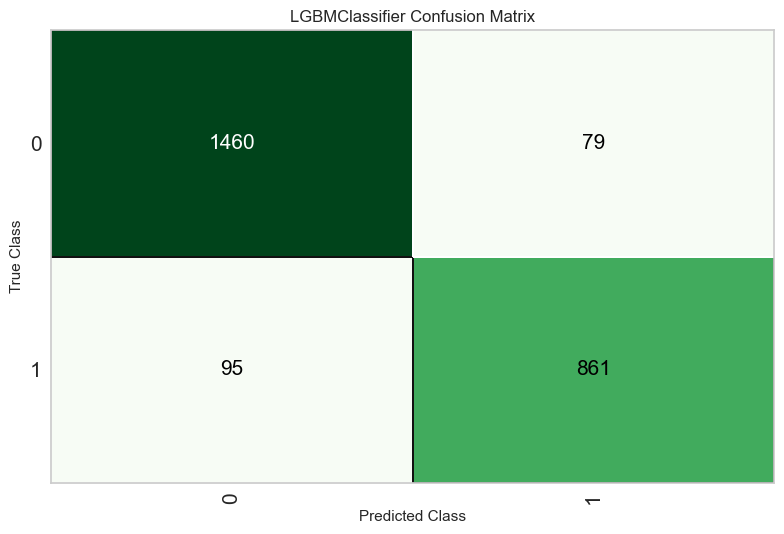

In [18]:
# 显示混淆矩阵

plot_model(best_model, plot='confusion_matrix')
# 图像说明：这是 GradientBoostingClassifier 的混淆矩阵，显示了模型在一个 2x2 网格上的分类结果。矩阵中包括：1459 个真负例（类别 0 正确预测为 0）、80 个假正例（类别 0 错误预测为 1）、98 个假负例（类别 1 错误预测为 0）以及 858 个真正例（类别 1 正确预测为 1）。正确预测的单元格以深绿色高亮显示。


> [!activity] **思考讨论**:

请根据模型的总体准确率和混淆矩阵报告其性能。模型的总体准确率是多少？假正率和假负率分别是多少？

In [19]:
# ‌误报率的解释如下
# 假设 confusion matrix 的结构如下（以二分类、正为“流失 (churn)”示例）：
#               Predicted Negative   Predicted Positive
# Actual Negative        TN                  FP
# Actual Positive        FN                  TP

# confusion matrix values
TN = 1463  # true negatives
TP = 868   # true positives
FP = 76    # false positives
FN = 88    # false negatives

#  计算 False Positive Rate（FPR）：在实际为负的样本中，误被预测为正的比例
FPR = FP / (FP + TN)

# 计算 False Negative Rate（FNR）：在实际为正的样本中，误被预测为负的比例
FNR = FN / (FN + TP)
print(f"False Positive Rate: FP / (FP + TN) = {FP} / ({FP} + {TN}) = {FPR:.2%}")
print(f"False Negative Rate: FN / (FN + TP) = {FN} / ({FN} + {TP}) = {FNR:.2%}")

print(f"Positives: {TP + FN}")
# 计算准确率
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: (TP + TN) / (TP + TN + FP + FN) = ({TP} + {TN}) / ({TP} + {TN} + {FP} + {FN}) = {accuracy:.2%}")


False Positive Rate: FP / (FP + TN) = 76 / (76 + 1463) = 4.94%
False Negative Rate: FN / (FN + TP) = 88 / (88 + 868) = 9.21%
Positives: 956
Accuracy: (TP + TN) / (TP + TN + FP + FN) = (868 + 1463) / (868 + 1463 + 76 + 88) = 93.43%


## 模型的商业影响

我们使用准确率（accuracy）和曲线下面积（AUC）来评估模型，但这些指标并不能反映模型的商业影响。要理解商业影响，我们需要知道正确预测所带来的收益，或者从更悲观的角度看，错误预测所带来的成本。

我们做出如下假设：

*   当一个潜在客户成功转化时，销售将带来 120 美元的增量收入
*   无论客户是否转化，跟进每一个潜在客户都会产生 15 美元的销售成本

我们将使用 Python 编写一个函数，并将其作为自定义指标添加到 PyCaret 中，以便在这些假设下评估模型的商业价值。

In [20]:
# 如果你之前运行过相同的 id='profit'，PyCaret 会报错 “ValueError: id already present in metrics dataframe.”。
# 在这种情况下，可以先运行以下命令清除旧指标再添加：

try:
    remove_metric('Profit')
except:
    pass

In [21]:
import numpy as np

# 在既定假设下定义一个用于计算利润的函数
def calculate_profit(actual, predicted):
    sales_expense = 15
    revenue = 120
    true_positive = np.where((predicted==1) & (actual==1), (revenue-sales_expense), 0)
    false_positive = np.where((predicted==1) & (actual==0), -sales_expense, 0)
    profit = np.sum([true_positive, false_positive])
    return profit

# 将自定义指标添加到 PyCaret
add_metric('profit', 'Profit', calculate_profit)

Name                                                            Profit
Display Name                                                    Profit
Score Function       <pycaret.internal.metrics.EncodedDecodedLabels...
Scorer               make_scorer(calculate_profit, response_method=...
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: profit, dtype: object

现在我们可以使用 `predict_model` 函数，通过新增的利润指标来评估模型。这将帮助我们更好地理解模型的商业影响。通过这种方式，我们不仅能看到模型的预测准确性，还能量化其在实际业务中的价值表现，例如识别哪些预测能带来最大收益，哪些错误预测可能导致成本浪费。

In [22]:
# 通过新增的利润指标来评估模型

preds = predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit
0,Light Gradient Boosting Machine,0.9303,0.9792,0.9006,0.9160,0.9082,0.8520,0.8521,89220


模型在训练数据上的利润约为 9 万美元，这是基于我们之前的假设得出的结果。

评估任务 1：请在不同假设条件下评估模型的利润。例如，如果销售成本增加到 20 美元，会发生什么变化？ 操作方法：修改 `calculate_profit` 函数中的 `sales_expense` 变量，将其设为 20，然后重新运行该代码单元，并再次运行 `predict_model` 函数。

```python
def calculate_profit(actual, predicted):
    sales_expense = 20
...
add_metric('profit_scenario_2', 'Profit', calculate_profit)
```



## 对新数据进行预测

比起预测旧潜在客户是否会转化，更有趣的是预测新潜在客户的转化可能性！

我们正好有一个包含新潜在客户的第二个数据集，这些客户是模型从未见过的。我们可以使用 predict_model 函数对这些新数据进行预测，并评估模型在新数据上的表现。

📌注意：

在加载数据前，必须确认新数据文件是否与 Jupyter Notebook 位于**同一文件目录中**，如果数据文件是和当前notebook保存在同一文档，那么可以直接运行后面的代码。

如果数据文件位于不同目录中，则需要提供文件的完整路径：
> 如果在 Windows 上，可以复制完整数据文件路径，然后替换文件所在位子：'C:/Users/YourName/Documents/my_data.csv'
>
> 如果在 Linux/macOS 上，可以复制完整数据文件路径，然后替换文件所在位子：'/home/YourName/Documents/my_data.csv'


In [23]:
# 加载新的潜在客户（new_leads.csv）数据
new_leads = pd.read_csv('new_leads.csv')

# 在新的潜在客户数据上进行预测
new_leads_predictions = predict_model(best_model, data=new_leads, raw_score=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit
0,Light Gradient Boosting Machine,0.9307,0.9756,0.9069,0.9216,0.9142,0.8561,0.8562,35370


需要考虑的事项：

*   模型在新数据上的准确率和 AUC 是否与在训练数据上的表现相似？
*   如果使用该模型来预测哪些新潜在客户会转化，我们能赚多少钱？

这些信息可以通过查看上面的表格获得，但赚钱的前景实在令人兴奋，因此我们将编写代码，从表格中提取利润数据。

In [24]:
profit = pull()['Profit'][0]
print(f"Profit for new leads: ${profit:,} 🎉")

Profit for new leads: $35,370 🎉


#### 新潜在客户的利润为：$34，545🎉

## 总结


> [!activity] **分析任务**：请评估模型在新数据上的表现。根据你之前设定的假设条件，计算模型在新潜在客户上的利润。然后，根据结果判断公司是否应该使用该模型来预测哪些新客户可能会转化。

In [25]:
# 新潜在客户数据中的潜在客户总数（包括已转化和未转化的）
n_leads = new_leads_predictions['Converted'].count()

# 新潜在客户数据中已转化的潜在客户数量
n_conversions = new_leads_predictions['Converted'].sum()
print(f"Number of conversions in new leads: {n_conversions} / {n_leads:,} ({n_conversions / n_leads:.2%})")

# 如果我们联系每一个潜在客户，总成本是多少？
cost = n_leads * 15

# 如果我们联系所有潜在客户，总共能赚取多少收益？
earnings = n_conversions * 120

# 如果我们联系所有潜在客户，总利润将是多少？
no_model_profit = earnings - cost

print(f"Profit for new leads when we used the model: ${profit:,} ")
print(f"Profit for new leads if we just contact everyone: ${no_model_profit:,} ")

# 与联系所有潜在客户相比，模型的效果提升了多少？
model_profit = profit - no_model_profit
print(f"Increase in profit for new leads by using the model: ${model_profit:,} ")

Number of conversions in new leads: 376 / 924 (40.69%)
Profit for new leads when we used the model: $35,370 
Profit for new leads if we just contact everyone: $31,260 
Increase in profit for new leads by using the model: $4,110 


结果显示：

新潜在客户的转化情况：376 / 924（40.69%）

使用模型时的利润：$34,545

如果联系所有潜在客户，利润为：$31,260

通过使用模型，利润增加：$3,285

## 参考文献

潜在客户（Leads）数据改编自 Leads Dataset。 [Leads Dataset](https://www.kaggle.com/datasets/ashydv/leads-dataset).



本笔记本到此结束，以下是本笔记的英文版本。

****

`bafcn_01_02_predictive_analytics_with_python.ipynb` | 2025-09-10 13:40

# Predictive analytics with Python

# Predictive analytics with Python

A "lead" is a potential customer who has shown interest in your product or service. Converting leads into customers is a key goal for any business, and sales and marketing teams spend a lot of time and effort on lead generation and lead management.

The core of this process is qualifying the leads. Of the many leads you have, which ones should the sales and conversion efforts focus on? How should the sales team prioritise their time and resources?

A data-driven way to answer these questions is to use predictive lead scoring. Predictive lead scoring uses historical data on leads and conversions to build a model that predicts the likelihood of a lead converting. This model can then be used to prioritise the leads, so the sales team can focus on the leads that are most likely to convert.

> ![Predictive lead scoring workflow](images/predictive_lead_workflow.png)
>
> Predictive lead scoring workflow (PyCaret, 2023)

In this notebook, we will use Python to analyse a dataset of leads and build a model to predict whether a lead will be converted or not. We'll load and explore the data, visualise it, build a predictive model, and understand what factors drive lead conversions. We will also use the model to predict which new leads will convert, and evaluate the business impact of the model.

In other words, we'll start with a spreadsheet of customer information and end with an understanding of how to make more money by focusing on the right leads.

This is a comprehensive preview of what you'll be capable of doing by the end of the subject.

---

By the way, all this only takes a few lines of Python code. Here they are:

```python
df = pd.read_csv('leads_train.csv')
df.info()
df.describe()
df['Lead Origin'].value_counts()
s = setup(df, target='Converted')
best_model = compare_models()
plot_model(best_model, plot='feature')
plot_model(best_model, plot='confusion_matrix')
add_metric('profit', 'Profit', calculate_profit)
new_leads = pd.read_csv('new_leads.csv')
new_leads_predictions = predict_model(best_model, data=new_leads)
```

That's it! You can do all of this in a few minutes with Python and the right libraries.

## Setup


In [26]:
%pip install --quiet pycaret==3.3.2 pandas==2.1.4 seaborn==0.13.2 matplotlib==3.7.5 numpy==1.26.4 ydata-profiling==4.16.1 openpyxl==3.1.5

^C
Note: you may need to restart the kernel to use updated packages.


In [27]:
import seaborn as sns

sns.set_theme(style="white", rc={'figure.figsize': (12, 6)})
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})

## Loading and viewing data

We will start by loading the data and viewing the first few rows, using the `pandas` library.

`pd.read_csv` reads the CSV file into a pandas dataframe, which we can then view using the `head` method.



In [28]:
import pandas as pd

# read CSV data into a pandas dataframe and display the first 5 rows for selected columns
df = pd.read_csv('leads.csv')
show_cols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']
df[show_cols].head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,API,Olark Chat,No,No,0,0.0,0,0.0
1,API,Organic Search,No,No,0,5.0,674,2.5
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0


Two more useful methods are `shape` and `info`. `shape` gives the number of rows and columns in the dataset, while `info` gives the data types and number of non-null values in each column. A "null" value is a missing value, which could be due to an error in data collection or entry.

In [ ]:
# how many rows and columns in the dataset?

df.shape

In [ ]:
# display the columns in the dataset, their data types and non-null values

df.info()

## Statistics and visualisations

We can use the `describe` method to view some basic statistics for numerical columns, such as count, mean, standard deviation, minimum, maximum, and quartiles.

We can also use visualisations to understand the distribution of data in each column, and how different columns are related to each other. Using the `seaborn` library we can create histograms, scatter plots, and other types of plots to visualise the data.

You can also do a lot more with visualisations and data storytelling in Tableau. I hope that my seaborn visualisations will inspire you to create your own visualisations in Tableau.

> [!tip] For Assessment 1, do your visualisations in Tableau.

In [ ]:
# distribution of numerical columns

df.describe()

In [ ]:
# where do our leads come from?

df['Lead Origin'].value_counts()

> [!activity] **For Assessment 1**: `Lead Origin` shows the origin of leads. A different variable `Lead Source` shows the _source_ of leads. Use `value_counts` to find the most common sources of leads.

The lead origin is probably important in determining whether a lead will convert. We can use a plot to visualise the conversion rate by lead origin.

In [ ]:
# plot the distribution of leads by origin

sns.catplot(data=df, x='Lead Origin', y='Converted', kind="bar").set(aspect=2)

# force width of plot to be 2x height for Canvas
import matplotlib.pyplot as plt
plt.gcf().set_size_inches(12, 6)

# image description: Bar chart showing conversion rates by lead origin. Quick Add Form has the highest conversion rate at 1.0, followed by Lead Add Form at approximately 0.9. API and Landing Page Submission have similar rates around 0.3, while Lead Import has the lowest at about 0.2. Error bars indicate variance in the data.

> [!activity] **For Assessment 1**: Create a visualisation in Tableau for `Lead Source` to see how the source of leads affects conversion rate. Use whatever visualisation and filtering techniques you think are appropriate.

Could total number of visits to the website be a good predictor of conversion? Let's look at the distribution of
`TotalVisits` first. What is the typical number of visits to the website?

In [ ]:
df['TotalVisits'].describe()

From this information we get the mean (average) number of visits: 3.4, the median (50%/middle) number of visits: 3, and the 25-75% range: 1-5 visits. This gives us an idea of the typical number of visits to the website.

> [!activity] **For Assessment 1**: Calculate basic statistics for `Total Time Spent on Website` and `Page Views Per Visit`. Use these statistics to describe the typical behaviour of visitors to the website.

We can also use a histogram to visualise the distribution of the number of visits to the website. We can use the `histplot` function from `seaborn` to create a histogram.

In [ ]:
# histogram of TotalVisits

sns.histplot(data=df, x='TotalVisits')

# image description: A histogram showing the distribution of total visits, with the x-axis ranging from 0 to 250 visits and y-axis showing count up to 2000. The data is heavily right-skewed, with the vast majority of observations concentrated near zero visits (showing a very tall peak at the left), and the frequency dropping dramatically as the number of visits increases.

An extreme value of 251 visits from one lead is making the histogram less useful for our purposes. We can limit the x-axis to show only the range of 0 to 15 visits.

In [ ]:
# histogram of TotalVisits, limit x-axis to 0-15, each bin (bar) is 1 visit wide

sns.histplot(data=df, x='TotalVisits', binwidth=1).set(xlim=(0, 15))

# image description: A histogram showing the distribution of total visits, with the x-axis ranging from 0 to 14 visits and y-axis showing count from 0 to 2000. The distribution is right-skewed, with the highest bar at 0 visits (approximately 2000 count), followed by a sharp decline. The frequency decreases steadily as the number of visits increases, with very few occurrences beyond 12 visits.

We see some unusual things in these histograms:

* A large number of leads do not visit the website at all. Where do these leads come from? Are they worth pursuing?
* Relatively few leads seem to visit the website exactly once. Is this a problem with the data collection or our visualisation?
* While very few leads visit the website more than 15 times, some visit the website more than 250 times! Are these leads very promising for the sales team, or just very likely to cause trouble for our analysis?

Exploratory visualisation will generate many questions like these, which can be answered by further analysis and domain knowledge. You will never have time to answer every question. Note them down, focus on any that need to be resolved for the task at hand, and review the rest later when you've clarified your goals and approach.

### Relationship between total time on website and conversion rate

Does total time spent on the website affect conversion rate?

Let's plot the distribution of total time spent on the website by conversion status.

In [ ]:
#   histogram of Total Time Spent on Website

sns.histplot(data=df, x='Total Time Spent on Website', hue='Converted')

# image description: A stacked bar chart showing the count of converted (orange) and non-converted (blue) users by total number of visits. The chart shows that users with fewer visits (0-2) have lower conversion rates, while the conversion rate appears to increase with more visits before tapering off. The total number of users decreases as visit count increases, with most users having 0-6 total visits.

Clearly yes! Visitors who spend more time on the website are more likely to convert. You can see visually where the number of visits "switches over" from being indicative of non-conversion to being indicative of conversion. This looks like a good predictor of conversion. We would expect the model to assign a high importance to this variable.

> [!activity] **For Assessment 1**: Create a visualisation in Tableau that shows the relationship between `Total Time Spent on Website`, `TotalVisits`, or `Page Views Per Visit` and conversion rate. Use whatever visualisation and filtering techniques you think are appropriate.

### Relationship between activity score and conversion rate

Another important variable is the `Activity Score`, which measures the level of activity of the lead. We can look at how total time on website, activity score, lead origin, and conversion status are all related.

We can use a scatter plot to visualise this relationship. I'm also using colour to show the conversion status of the lead, and facets (panels) to show the relationship for different lead origins.

In [ ]:
# plot total time on website vs activity score, facet by origin
import seaborn as sns

# plot only key origins: API, Landing Page Submission, Lead Add Form
plot_df = df[df['Lead Origin'].isin(['API', 'Landing Page Submission', 'Lead Add Form'])]

# Create the faceted scatter plot with relplot
# add regression line to show relationship
sns.relplot(data=plot_df,
            x='Total Time Spent on Website',
            y='Activity Score',
            col='Lead Origin',
            hue='Converted',
            kind='scatter',
            )

# image description: Three scatter plots showing the relationship between Total Time Spent on Website (x-axis) and Activity Score (y-axis) for different lead origins: API, Landing Page Submission, and Lead Add Form. Points are colored by conversion status (blue for not converted, orange for converted). The plots show that converted leads (orange points) tend to cluster at higher activity scores across all lead origins, with the most conversions occurring in the 14-17 activity score range.

In [ ]:
sns.lmplot(data=plot_df, x='Total Time Spent on Website', y='Activity Score', col='Lead Origin', hue='Converted')

# image description: Three scatter plots showing the relationship between total time spent on website (x-axis) and activity score (y-axis) for different lead origins: API, Landing Page Submission, and Lead Add Form. Points are colored by conversion status (blue for non-converted, orange for converted). The API chart shows a negative correlation with a downward trend line, while the other two origins show relatively flat relationships with no clear trends.

> **For Assessment 1**: Create a visualisation in Tableau that shows a distinct relationship between conversion and at least 2 other variables of your choice. Use whatever visualisation and filtering techniques you think are appropriate.

## Model building

We will use the `pycaret` library to build a model to predict whether a lead will be converted or not. The `pycaret` library provides a high-level interface for training and evaluating machine learning models, and can be used to quickly build and compare models.

We will use the `setup` function to set up the data for training, and the `compare_models` function to compare different models and select the best one.

In [ ]:
# set up a PyCaret classification session to predict customer churn

from pycaret.classification import *
s = setup(df, target = 'Converted')

We get a lot of information about the data from a predictive modelling perspective, including the number of rows and columns, the number of features, the number of categorical and numerical features, and the number of missing values.

Notice that there are a lot of rows with missing values. PyCaret will automatically handle missing values and other data preparation tasks when building the model. Before doing this ourselves, let's see if PyCaret can do it for us.

We will use the `compare_models` function to compare the performance of different models on the data, and select the best one for further analysis.

In [ ]:
# compare all models

best_model = compare_models()

In this case, the best model is the Light Gradient Boosting Machine. Its predictions were 94% accurate on the training data, and it has an "area under the curve" (AUC) of 0.98. AUC is a common metric for classification tasks. An AUC of 1.0 is perfect, while an AUC of 0.5 is random guessing.

Next we'll understand how the model is making predictions by looking at the feature importance and the confusion matrix.

## Model interpretation

The `plot_model` function in PyCaret can be used to visualise many aspects of the model's performance. We will first look at the feature importance, which shows how much each feature contributes to the model's predictions.

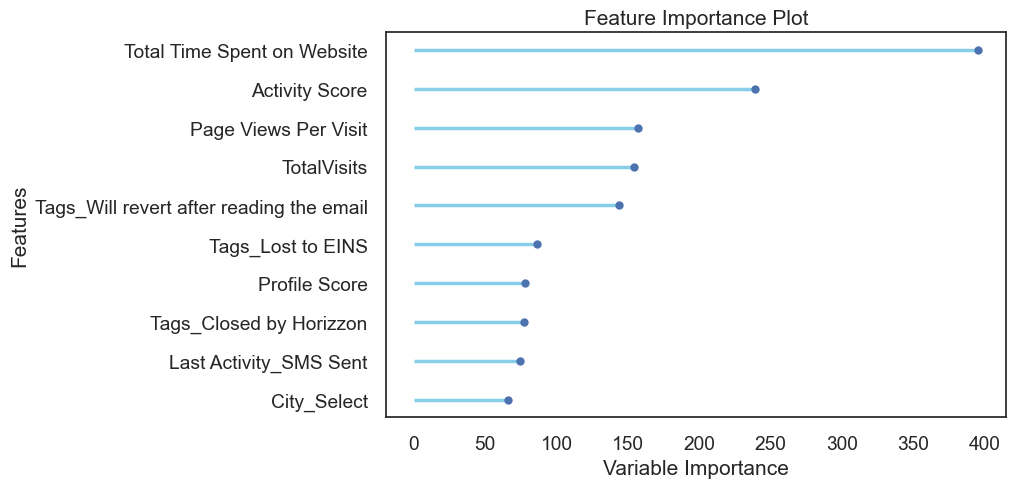

In [29]:
# Feature Importance

plot_model(best_model, plot='feature')
# image description: Feature importance plot showing the relative importance of 10 variables in predicting outcomes. "Total Time Spent on Website" has the highest importance at approximately 0.175, followed by "Tags_Will revert after reading the email" at about 0.14. Other notable features include "Lead Origin_Lead Add Form" (0.11) and "Last Notable Activity_SMS Sent" (0.095). The remaining variables have lower importance scores ranging from about 0.025 to 0.07.


According to this chart the most important features are `Total Time Spent on Website`, `Activity Score`, and `Page Views Per Visit`. These features are the most important in predicting whether a lead will be converted or not.

> [!activity] **For Assessment 1**: Use the `plot_model` function in PyCaret to understand the model's predictions. Describe the most important features and how they affect the model's predictions. The visualisations you made earlier in Tableau will also be useful for this task.

Where does the model make mistakes? We can use the confusion matrix to see how well the model is predicting the target variable.

Class 0 is "not converted" and class 1 is "converted". So the cell for predicted class 1, actual class 1 contains the number of leads that were predicted to convert and did convert: our "true positives". The cell for 0, 0 contains the number of leads that were predicted not to convert and did not convert: our "true negatives". The other two cells contain the "false positives" and "false negatives".

These two cells are correct predictions. All the other cells in a confusion matrix are incorrect predictions. This more detailed view can help us understand where the model is making mistakes, and how we might improve it.

In [ ]:
# plot confusion matrix

plot_model(best_model, plot='confusion_matrix')
# image description: Confusion matrix for GradientBoostingClassifier showing classification results on a 2x2 grid. The matrix displays: 1459 true negatives (class 0 correctly predicted as 0), 80 false positives (class 0 incorrectly predicted as 1), 98 false negatives (class 1 incorrectly predicted as 0), and 858 true positives (class 1 correctly predicted as 1). The correct predictions are highlighted in dark green.


> [!activity] **For Assessment 1**:
> Report on the model's performance considering the overall accuracy and the confusion matrix. What is its overall accuracy? What are the false positive and false negative rates?

In [30]:
# example of how to calculate FPR and FNR given the confusion matrix values
# https://en.wikipedia.org/wiki/False_positive_rate

# confusion matrix values
TN = 1477  # true negatives
TP = 859   # true positives
FP = 62    # false positives
FN = 97    # false negatives

# calculate false positive rate (FPR) and false negative rate (FNR)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)
print(f"False Positive Rate: FP / (FP + TN) = {FP} / ({FP} + {TN}) = {FPR:.2%}")
print(f"False Negative Rate: FN / (FN + TP) = {FN} / ({FN} + {TP}) = {FNR:.2%}")

print(f"Positives: {TP + FN}")
# calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: (TP + TN) / (TP + TN + FP + FN) = ({TP} + {TN}) / ({TP} + {TN} + {FP} + {FN}) = {accuracy:.2%}")


False Positive Rate: FP / (FP + TN) = 62 / (62 + 1477) = 4.03%
False Negative Rate: FN / (FN + TP) = 97 / (97 + 859) = 10.15%
Positives: 956
Accuracy: (TP + TN) / (TP + TN + FP + FN) = (859 + 1477) / (859 + 1477 + 62 + 97) = 93.63%


## Business impact of model

We used accuracy and area-under-curve (AUC) to evaluate the model, but these metrics don't tell us the business impact of the model. To understand the business impact, we need to know the benefits of correct predictions, or more pessimistically, the cost of incorrect predictions.

I've made some assumptions as follows:

* When a lead converts, the sale is worth $120 of incremental revenue

* Chasing any lead costs $15 of sales expense, regardless of whether the lead converts or not

Let's write this in Python and add it as a custom metric, so PyCaret can evaluate the model under these assumptions.

In [ ]:
# if you want to change the profit metric but PyCaret tells you
# 'ValueError: id already present in metrics dataframe.'
# you can run this cell to remove the metric

try:
    remove_metric('Profit')
except:
    pass

In [ ]:
import numpy as np

# define a function to calculate profit under stated assumptions
def calculate_profit(actual, predicted):
    sales_expense = 15
    revenue = 120
    true_positive = np.where((predicted==1) & (actual==1), (revenue-sales_expense), 0)
    false_positive = np.where((predicted==1) & (actual==0), -sales_expense, 0)
    profit = np.sum([true_positive, false_positive])
    return profit

# add metric to PyCaret
add_metric('profit', 'Profit', calculate_profit)

Now we can use the `predict_model` function to evaluate the model using the new profit metric. This will give us a better understanding of the business impact of the model.

In [ ]:
# assess model performance using profit metric

preds = predict_model(best_model)

The model's profit on the training data is about $90k according to our assumptions.

> **For Assessment 1**: Evaluate the profit under different assumptions. For example, what if the sales expense increased to $20?
> To do this: change the `sales_expense` variable in the `calculate_profit` function, re-run the cell, and re-run the `predict_model` function.

```python
def calculate_profit(actual, predicted):
    sales_expense = 20
...
add_metric('profit_scenario_2', 'Profit', calculate_profit)
```



## Making predictions for new data

What's more interesting than predicting whether old leads will convert? Predicting whether new leads will convert!

We happen to have a second dataset containing some new leads that the model has never seen. We can use the `predict_model` function to make predictions on this new data, and evaluate the model's performance on the new data.

First we load the data, then we make predictions, and finally we evaluate the model's performance on the new data.

In [ ]:
# load new leads data
new_leads = pd.read_csv('new_leads.csv')

# predict on new leads data
new_leads_predictions = predict_model(best_model, data=new_leads, raw_score=True)

Things to consider:

* Is the model's accuracy and AUC on the new data similar to its performance on the training data?

* How much money can we make by using the model to predict which of the new leads will convert?

You can get that information from reading the table above, but the prospect of making money is so exciting that we'll write code to pull the profit out of the table.

In [ ]:
profit = pull()['Profit'][0]
print(f"Profit for new leads: ${profit:,} 🎉")

## Conclusion


> [!activity] **For Assessment 1**: Evaluate the model's performance on the new data. What is the profit from the new leads, given the assumptions you made? Recommend whether or not the company should use the model to predict which new leads will convert.

In [ ]:
# number of leads in new leads (total, including converted and didn't convert)
n_leads = new_leads_predictions['Converted'].count()

# number of converting leads in new leads
n_conversions = new_leads_predictions['Converted'].sum()
print(f"Number of conversions in new leads: {n_conversions} / {n_leads:,} ({n_conversions / n_leads:.2%})")

# if we contact every lead, how much will it cost?
cost = n_leads * 15

# if we contact every lead, how much will we earn?
earnings = n_conversions * 120

# if we contact every lead, how much will we profit?
no_model_profit = earnings - cost

print(f"Profit for new leads when we used the model: ${profit:,} ")
print(f"Profit for new leads if we just contact everyone: ${no_model_profit:,} ")

# how much better is the model than just contacting everyone?
model_profit = profit - no_model_profit
print(f"Increase in profit for new leads by using the model: ${model_profit:,} ")

## References

Leads data adapted from [Leads Dataset](https://www.kaggle.com/datasets/ashydv/leads-dataset).